# Named Entity Recognition

Named Entities, auf Deutsch benannte Entitäten, sind Sachen, die in einem Text genannt werden und einen Namen haben. Beispiele für Dinge, die einem Namen haben, sind Personen, Orte und Organisationen. Oft sind gerade die Dinge die mit einem Namen genannt werden, interessant. Aus diesem Grund ist die Extraktion oder die Erkennung von Named Entities wichtig.

Es gibt im Wesentlichen zwei Verfahren für Named Entity Recognition (NER). Die erste Möglichkeit ist, dass man  Regeln schreibt, wie z.B. Personennamen aufgebaut sind und in welchen Kontexten sie vorkommen. Diese Regeln kann man sehr gut mit den regulären Ausdrücke, die wir schon kennengelernt haben, vergleichen, und zum Teil ist das NER auch mit NER möglich. Die zweite Möglichkeit ist, dass man ein System trainiert, das aus Beispielen Eigenschaften von Wörtern lernt und auf Grund davon, für jedes Wort im Text entscheidet, ob es zu einer benannten Entität gehört. 

Wir werden NER jetzt nicht selber implementieren, obwahl das nicht sehr schierig ist, sondern nutzen die Bibliothek _Spacy_  und ein bereits trainiertes Modell. Spacy stellt ausser NER viele Funktionen zur Verfügung, wie Tokenisierung, Lemmatisierung und POS-Tagging.

In der dritten Übung haben wir Wikipedia-Texte über Firmen analysiert. In diesen Texten werden sehr viele Firmennamen genannt. Schauen wir mal, ob Spacy die erkennnt. 

Als erstes müssen wir Spacy (einmalig) installieren:

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

In [3]:
import glob
import codecs
import spacy

spacy_engine_de = spacy.load('de_core_news_sm')

filelist = glob.glob("../Einheit3/Firmen/*.txt")
#filelist = glob.glob("brexit/*.txt")
f = filelist[0]
datei = codecs.open(f,'r','utf8')
text = datei.read()
datei.close()
    
f_doc = spacy_engine_de(text)
for entity in f_doc.ents:
    print(entity.text,'--- ',entity.label_)

A123 Systems ---  ORG
Inc ---  LOC
Jahr 2001 ---  MISC
amerikanischer ---  MISC
chinesischen ---  MISC
Wanxiang ---  ORG
A123Systems ---  ORG
Nanoelektroden-Technik ---  ORG
Massachusetts Institute of Technology ---  ORG
General Electric ---  ORG
Alliance Capital ---  PER
Sequoia Capital ---  PER
CMEA Ventures ---  ORG
FA Technology Ventures ---  ORG
OnPoint ---  ORG
Massachusetts Institute of Technology ---  ORG
Motorola ---  LOC
Qualcomm ---  LOC
Duracell ---  PER
Procter & Gamble ---  ORG
A123Systems ---  ORG
A123 ---  MISC
A123Systems ---  MISC
Lithium-Ionen-Akkusystems ---  MISC
A123Systems ---  MISC
Massachusetts Institute of Technology ---  ORG
DeWalt-Werkzeugen ---  LOC
Flugzeugtriebwerken ---  LOC
Hybridfahrzeugen ---  LOC
Elektromobilen ---  LOC
United States Advanced Battery Consortium ---  ORG
USABC ---  ORG
USABC ---  ORG
DaimlerChrysler ---  ORG
Ford ---  ORG
General Motors ---  ORG
USABC ---  ORG
Vertrag in Zusammenarbeit ---  MISC
Vereinigten Staaten ---  LOC
A123System

Spacy kann die NEs auch sehr schön im Text anzeigen:

In [4]:
from spacy import displacy
displacy.render(f_doc, style = "ent",jupyter = True)

Wir sehen, dass viel Richtiges gefunden wurde, aber es eben auch viele Fehler gibt: 
1. Es gibt Wörter, die keine NE sind, die aber als solche erkannt werden.
2. Es gibt NE die falsch klassifiziert sind (Organisation als Person)
3. Es gibt NEs im Text, die gar nicht in dieser Liste auftauchen
4. Es gibt Namen, die in mehreren Varainten in der Liste stehen.

Wir schreiben jetzt eine Funktion, die NEs aus einem Text extrahiert und alle als Ergebnis zurückgibt. Jede NE wird von dieser Funktion nur ein mal berücksichtigt.

In [157]:
def NE_in_doc(text):
    orgs = set()
    
    doc = spacy_engine_de(text)
    for entity in doc.ents:
        if entity.label_ == 'ORG' or entity.label_ == 'PER': # or entity.label_ == 'LOC':
            if len(entity.text) > 3 or entity.text.isupper(): # Hiermit schließen wir einige komische Fehler aus
                orgs.add(entity.text)
    
    return orgs

In [158]:
NE_in_doc(text)

{'BSR',
 'Bautyps –',
 'Beijing Subway Rolling Stock Equipment',
 'Bombardier Flexity Berlin',
 'CSR',
 'CSR Sifang',
 'DB Regio',
 'Emil Zátopek',
 'Emil Zátopek-Lokomotiven',
 'Ganz-Skoda Electric Ltd',
 'Heutige',
 'InterPanter',
 'Metro Prag',
 'Metro Tbilissi',
 'National Express',
 'NěVa',
 'Oberleitungsbussen',
 'Pars Nova',
 'Pilsen/Tschechien',
 'Porsche',
 'Prager Straßenbahnen',
 'RegioPanter',
 'Regionalverkehr',
 'SOR Libchavy',
 'Solaris Bus & Coach',
 'Transtech',
 'United Streetcar',
 'ZAO Wagonmasch',
 'ZREPS',
 'Škoda',
 'Škoda 109E',
 'Škoda 7Ev',
 'Škoda 9Tr',
 'Škoda City Service',
 'Škoda Electric',
 'Škoda Elektra',
 'Škoda ForCity',
 'Škoda Transportation',
 'Škoda Transportation Deutschland GmbH',
 'Škoda Vagonka',
 'Škoda Vektra'}

## Ein Netzwerk von Named Entities

Wir wollen unsere Textsammlung etwas analysieren.  Wir können erstens zählen, wie häufig jede NE vorkommt und zweitens wie oft zwei NEs zusammen in einem Text vorkommen. Wir nutzen hierfür einen _Counter_ und ein _Dicitionary_ von Namen und Counters.

In [159]:
from collections import Counter

orgs = Counter()
orgs_cooccurrence = {}

for f in filelist:    
    datei = codecs.open(f,'r','utf8')
    text = datei.read()
    datei.close()
    organizations = NE_in_doc(text)
    for org in organizations:
        if org not in orgs_cooccurrence:
            orgs_cooccurrence[org] = Counter(organizations)
        else:
            orgs_cooccurrence[org].update(organizations)
            
    orgs.update(organizations)

In [160]:
orgs.most_common(20)

[('ISBN', 69),
 ('New York Stock Exchange', 33),
 ('NYSE', 26),
 ('NASDAQ', 22),
 ('EU', 19),
 ('Stuttgart', 19),
 ('IBM', 17),
 ('Hrsg.', 17),
 ('Jahren', 17),
 ('Ford', 16),
 ('London Stock Exchange', 16),
 ('Microsoft', 15),
 ('Fiat', 15),
 ('New Yorker Börse', 15),
 ('Siemens', 14),
 ('General Electric', 14),
 ('EU-Kommission', 14),
 ('Londoner Börse', 14),
 ('Daimler', 14),
 ('Deutschland', 13)]

In [161]:
len(orgs)

16498

In [225]:
orgs_cooccurrence['Boeing']['Airbus']

3

In [237]:
orgs_cooccurrence['Boeing']['NASA']

2

Wir können natürlich kein Netzwerk mit 23 000 Knoten anzeigen. Wir reduzieren die Daten darum auf die häufigsten NEs schließen aber gleichzeitig auch die allerhäufigsten aus.

In [297]:
NERList = {NE:freq for (NE,freq) in orgs.items() if freq > 10 and freq < 50}

In [298]:
len(NERList)

28

Jetzt reduzieren wir auch noch den Kookkurenzmatrix:

In [299]:
Relations = {NE1:{NE2:freq for (NE2,freq) in orgs_cooccurrence[NE1].items() if NE2 in NERList} for NE1 in NERList}

## Visualisierung

Im folgende Abschnitt wollen wir versuchen die oben berechneten Bziehungen graphisch darzustellen. Es ist nicht notwendig den Code hierfür genau zu verstehen.

Vermutlich müssen Sie erst einige Bibliotheken installieren. Hier als Beispiel die Installation von _plotly_:

In [265]:
!pip install plotly

In [266]:
# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt

Wir bauen jetzt zunächst den Graphen auf. Ein Knoten für jede Organisation und eine Kante für jede Beziehung. Wir geben die Kanten auch ein Gewicht. Das ergibt nachher eine bessere Verteilung von den Knoten. Wir müssen die Gewichte aber nicht linear mit der Anzahl der Kookkurenzen ansteigen lassen. Hier habe ich eine willkürlich ausgedachte logarithmische Formel genutzt.

In [307]:
companies = nx.Graph()# 

for org in NERList:
    companies.add_node(org,size = orgs[org])

for org1 in Relations:
    for org2 in Relations[org1]:
        if org2 != org1:
            companies.add_edge(org1, org2,  weight =  2 + math.log(Relations[org1][org2]))

Wir rufen jetzt eine Methode auf, die Positionen für die Knoiten berechnet. 

In [308]:
# Get positions for the nodes in G
nodepositions = nx.spring_layout(companies)

Jetzt können wir das Ntzwerk schon zeigen!

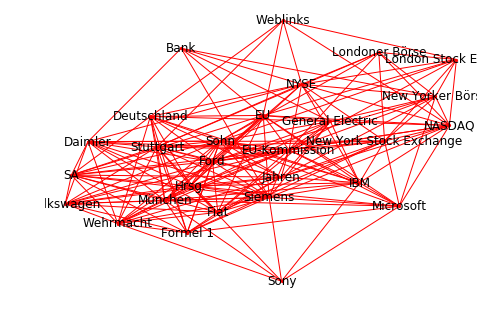

In [330]:
nx.draw(companies, nodepositions, node_size=5, edge_color="r", font_size=12, with_labels=True)
plt.show()

Zum Schluss versuchen wir das ganze mit Plotly noch etwas schöner zu gestalten. Wir passen die Größe der Knoten an der Häufigkeit der Entitäten an und machne das Gleiche für die Stärke der Kanten.

Damit man am Ende ein schönes Ergebnis hat, muss man ein wenig mit den Funktionen für die Berechnung der Größen spielen.

In [342]:
# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 9,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node, get the position and size and add to the node_trace
for node in companies.nodes():
    x, y = nodepositions[node]
    node_trace['x'] += (x,) 
    node_trace['y'] += (y,) 
    node_trace['marker']['color'] += ('cornflowerblue',)
    node_trace['marker']['size'] += (3+0.8*orgs[node],) 
    node_trace['text'] += ('<b>' + node + '</b>',)
    
    
# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, width):
    return  go.Scatter(x     = x,
                       y     = y,
                       line  = dict(width = width, color = 'cornflowerblue'),
                       mode  = 'lines')


# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in companies.edges():
    org1 = edge[0]
    org2 = edge[1]
    x0, y0 = nodepositions[org1]
    x1, y1 = nodepositions[org2]
    linewidth = 0.1*Relations[org1][org2]**1.75
    trace  = make_edge([x0, x1, None], [y0, y1, None],  width = linewidth)
    edge_trace.append(trace)
    
    
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()    